# Data Manipulation Sprint Journal for Jon Honda

---
## DAY 1: Tuesday (Week 1)
### What I Expect to Learn
* If someone asks me what data serialization is, what would I say?
* What is pickling?
* What are some specific efficiencies gained by using data serialization?
* How is serialized data stored in a SQLite database?

### Project References
#### info on dictionaries
* http://thomas-cokelaer.info/tutorials/python/dicts.html
* 
#### info on pickling:
* https://docs.python.org/3/library/pickle.html
* https://www.saltycrane.com/blog/2008/01/saving-python-dict-to-file-using-pickle/
* https://stackoverflow.com/questions/2047814/is-it-possible-to-store-python-class-objects-in-sqlite


### Project Pitch
* I will explore how data serialization in python can be used to more efficiently store and retrieve database data from one data field instead of multiple fields. This should allow me to reduce the number of data tables and code needed to interact with data tables

* I propose to implement pickling in python to serialize data about mathematical expressions stored in a database. Serialization should reduce the number of data tables and python code development since we can store multiple pieces of information about an expression in a serialized data field.

## Gameplan
Here is my overall approach 
1. Define a bunch of expressions, including variables, variable data types, if variable is itself another expression
2. Sketch out how you would approach this problem w/o data serialization
3. Explore pickling - how to use it, how to store nested data
4. Is recursion still needed to make system work?
5. Fog of uncertainty so thick....can't see what to do after this.


#### I googled python pickle and got this: https://docs.python.org/3/library/pickle.html

## BIG WARNING:
#### Warning The pickle module is not secure against erroneous or maliciously constructed data. Never unpickle data received from an untrusted or unauthenticated source.

#### more info: What is a pickle?  
#### “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. Pickling (and unpickling) is alternatively known as “serialization”, “marshalling,” [1] or “flattening”; however, to avoid confusion, the terms used here are “pickling” and “unpickling”.

#### im seeing sevaral search returns saying not to serialize data:
#### 1. https://news.ycombinator.com/item?id=11814002
#### 2. http://www.benfrederickson.com/dont-pickle-your-data/
#### 3. https://stackoverflow.com/questions/198692/can-i-pickle-a-python-dictionary-into-a-sqlite3-text-field

#### re 2, comments here: https://news.ycombinator.com/item?id=7226207
#### mostly say that JSON alternative to pickling works in some cases, but not all. need to decide on case-by-case basis if pickling is a good alternative
#### also says pickling is kind of a hack, quick and dirty, not good if you need to query on the serialized data

In [ ]:
#### how to store and retrieve pickled data from SQLite db:
#### https://stackoverflow.com/questions/198692/can-i-pickle-a-python-dictionary-into-a-sqlite3-text-field
# I needed to achieve the same thing too.

# I turns out it caused me quite a headache before I finally figured out, thanks to this post, how to actually make it work in a binary format.

# To insert/update:

# pdata = cPickle.dumps(data, cPickle.HIGHEST_PROTOCOL)
# curr.execute("insert into table (data) values (:data)", sqlite3.Binary(pdata))
# You must specify the second argument to dumps to force a binary pickling.
# Also note the sqlite3.Binary to make it fit in the BLOB field.

# To retrieve data:

# curr.execute("select data from table limit 1")
# for row in curr:
#   data = cPickle.loads(str(row['data']))
# When retrieving a BLOB field, sqlite3 gets a 'buffer' python type, that needs to be strinyfied using str before being passed to the loads method.

#### another good resource (maybe better than the above one): https://www.saltycrane.com/blog/2008/01/saving-python-dict-to-file-using-pickle/


#### from the python documentation: https://docs.python.org/3/library/pickle.html
#### Pickle the data: For the simplest code, use the dump() and load() functions.
import pickle

# An arbitrary collection of objects supported by pickle.
data = {
    'a': [1, 2.0, 3, 4+6j],
    'b': ("character string", b"byte string"),
    'c': {None, True, False}
}

with open('data.pickle', 'wb') as f: #### create a file to write binary data to
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL) ####uses the latest pickling version

    
#### read pickled data:
import pickle

with open('data.pickle', 'rb') as f: #### read binary file data to memory
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)
print(data)


#### I spent some time sort of mapping out the math expression evaluator concept:

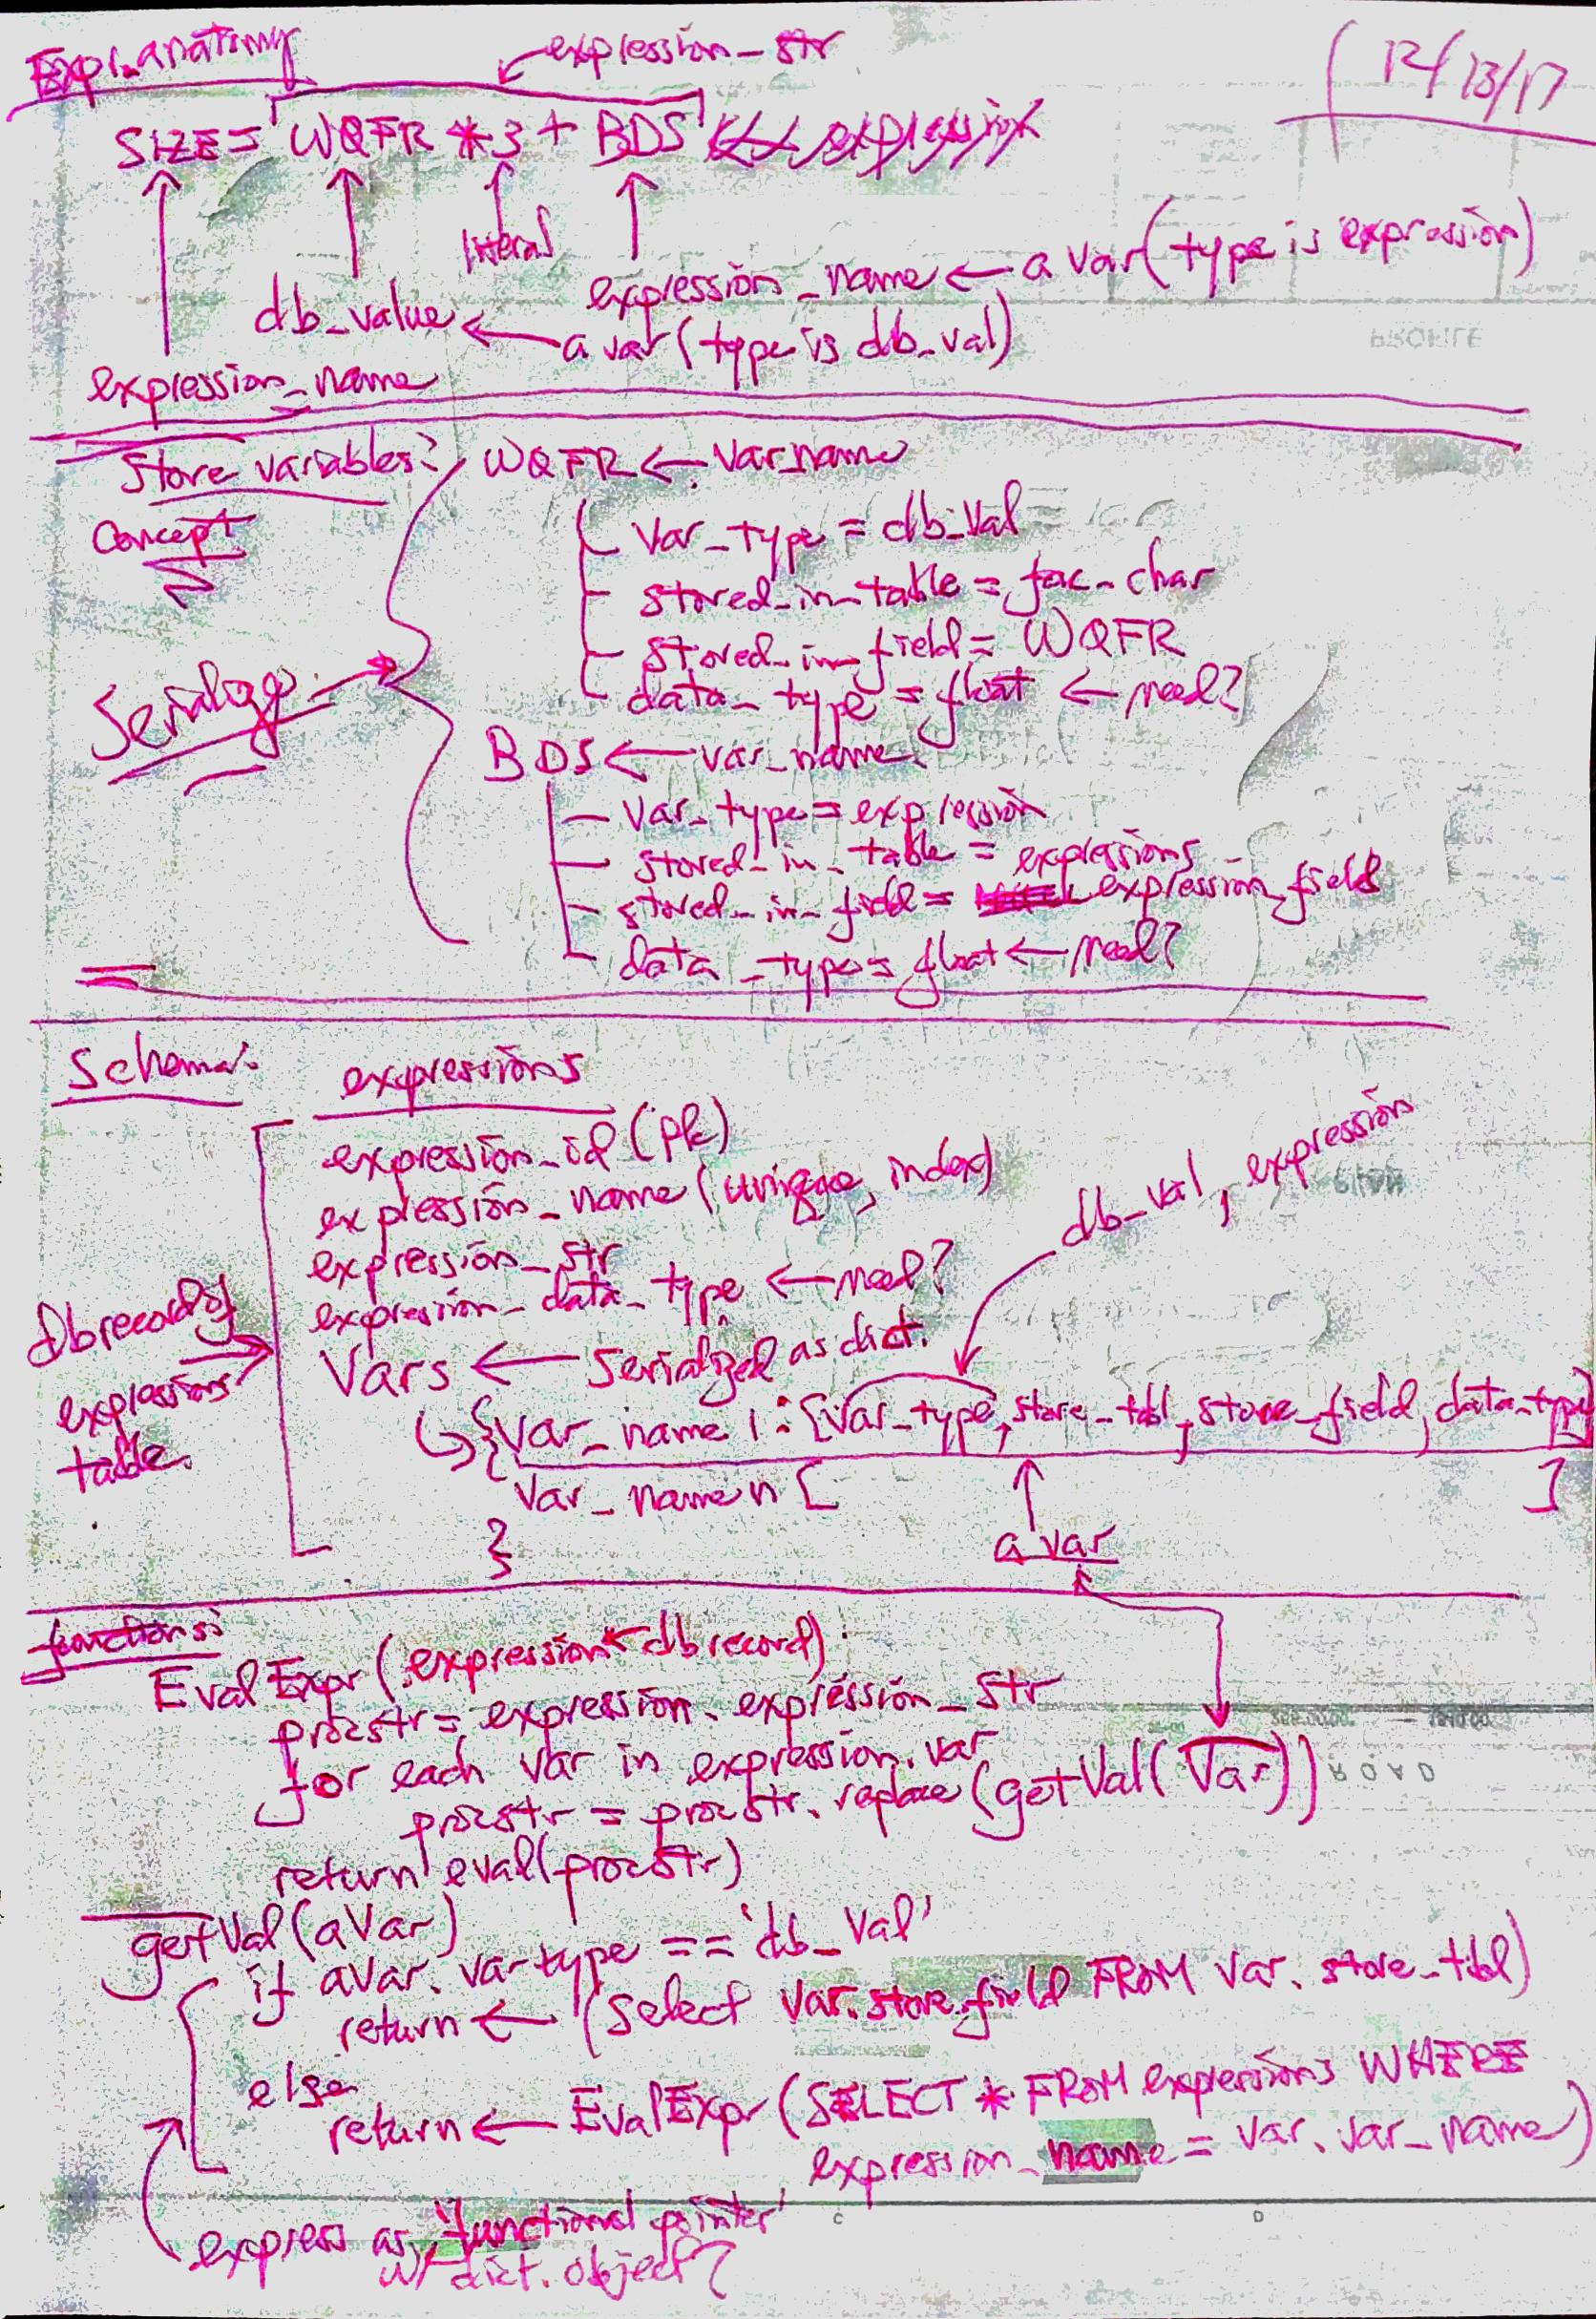



--- 
## DAY 2: Wednesday (Week 1)
### Pitch Feedback 
*These are comments I received or ideas I had from people's feedback to my pitch *

### Prototype Notes
*Results from prototype experiments, snippets of code, things I tried * 

### Pair Show & Tell Comments
*Comments from prototype discussion*

*These comments lead into plan development. Key considerations for me and my partner:  Do I have a plan? Is my plan feasible?*

### Proposed Plan: Key Milestones by Day

##### Day 2 (Wed Week 1):
- Develop Project Proposal
- Push Docs / Repo / Roadmap Update

##### Day 3 (Thu Week 1):
- *milestone 1: prototype defining expression entity*
- *milestone 2: prototype pickling expression's variable data*
- *milestone 3: setup SQLite database to hold expression entity*
- *milestone 4: prototype depickling expression variable data*
- *milestone 5: prototype expression evaluating function*
- Push docs / repo

##### Day 4 (Tue Week 2): 
- *milestone X+1*
- *milestone X+2*
- *milestone X+3*
- Push docs / repo

##### Day 5 (Wed Week 2):
- Project highlights
- Identify question or cohort knowledge gap for sprint review
- Develop Topic Project + Presentation
- Push Repo / docs / Presentation

### Project Definition and README.MD Discussion 
*This is a discussion of how this project will fit into my overall roadmap. I will update my roadmap with the following project definition*

*I will focus my project Repo's README.MD on the same topic, but with this additional detail.*


In [ ]:
### Prototyping work:
#### define a dictionary object to hold variable data in one field.
#### what is a dict? http://thomas-cokelaer.info/tutorials/python/dicts.html
#### A dictionary is a sequence of items. Each item is a pair made of a key and a value. Dictionaries are not sorted. You can access to the list of keys or values independently.
d = {'a':['db_val','fac_char','WQFR']} #### dictionary comprised of array
print(d['a'][0]) #### get element 0 of key 'a'
#### can you use constants to refer to array elements?
C_VARTYPE = 0
C_STORED_TABLE = 1
C_STORED_FIELD = 2
print (d['a'][C_STORED_TABLE])

In [ ]:
####DEFINE MORE DATA, THEN EXPLORE SERIALIZING IT:
VARS = {'WQFR':['db_val','fac_char','WQFR'],
       'BMP_SIZE':['expression','expressions','expression_str'],
        'SOIL_HSG':['db_val','fac_char','HSG']
       }

#### now pickle my dictionary data:
import pickle
with open('_jonhonda_dat//data.pickle', 'wb') as f: #### create a file to write binary data to
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(VARS, f, pickle.HIGHEST_PROTOCOL) ####uses the latest pickling version

    
#### read pickled data:
with open('_jonhonda_dat//data.pickle', 'rb') as f: #### read binary file data to memory
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    retVARS = pickle.load(f)
print(retVARS)

In [25]:
#### Great! now let's try inserting pickle into SQLite database.
#### need to create a db w/ the expressions table using our schema:
#### write to DB:
import sqlite3
import os
db = sqlite3.connect(':memory:') #### allocate memory
try:
    os.remove('_jonhonda_dat//toyExprDB') #### remove existing db if it exists
    print ('killed existing db')
except FileNotFoundError as err:
    print('db does not exist - okay make it') #### do nothing
db = sqlite3.connect('_jonhonda_dat//toyExprDB')  #### make a database
cursor = db.cursor()
#### build expression table:
cursor.execute ('''CREATE TABLE expressions(
    expression_id INTEGER PRIMARY KEY, 
    expression_name TEXT, 
    expression_str TEXT,
    expression_data_type TEXT, 
    vars BLOB)''')
db.commit()

#### build a toy table that hold variable values:
cursor.execute ('''CREATE TABLE sizes(
    size_id INTEGER PRIMARY KEY,
    area FLOAT,
    volume FLOAT,
    length FLOAT
)''')
db.commit()

#### put some values into variable value tables
cursor.execute ('''INSERT INTO sizes(area, volume, length) VALUES(?,?,?)''', (25.6,33.1,2.5))
cursor.execute ('''INSERT INTO sizes(area, volume, length) VALUES(?,?,?)''', (45.6,23.4,0.5))
cursor.execute ('''INSERT INTO sizes(area, volume, length) VALUES(?,?,?)''', (14.8,2.6,1.6))
db.commit()

#### make some expression data:
expression_name = 'SIZE'
expression_str = 'area*3+volume-length*length*length-SIDE'
expression_data_type = 'float'
#### store variable data in a dictionary object
#### format: [dbVarType, dbTable, dbField, dbQryOnUniqueField, valDataType]
VARS = {'area':['db_val','sizes','area', 'size_id', 'FLOAT'], 
       'volume':['db_val','sizes','volume', 'size_id', 'FLOAT'],
       'length':['db_val','sizes','length', 'size_id', 'FLOAT'],
        'SIDE':['expression','expressions','expression_str', 'expression_name', 'FLOAT']
       }
#### now serialize the variable dictionary w/ pickling:
import pickle
# Pickle the 'data' dictionary using the highest protocol available.
# use the dumps command to write pickle to a string
mypickle = pickle.dumps(VARS, pickle.HIGHEST_PROTOCOL) ####uses the latest pickling version
#### NOW INSERT DATA TO DB:
cursor.execute ('''INSERT INTO expressions(expression_name, expression_str, expression_data_type, vars) VALUES(?,?,?,?)''',(expression_name,expression_str,expression_data_type,mypickle))
db.commit()

expression_name = 'SIDE'
expression_str = 'length*4'
expression_data_type = 'float'
#### store variable data in a dictionary object
#### format: [dbVarType, dbTable, dbField, dbQryOnUniqueField, valDataType]
VARS = {'length':['db_val','sizes','length', 'size_id', 'FLOAT']}
#### now serialize the variable dictionary w/ pickling:
import pickle
# Pickle the 'data' dictionary using the highest protocol available.
# use the dumps command to write pickle to a string
mypickle = pickle.dumps(VARS, pickle.HIGHEST_PROTOCOL) ####uses the latest pickling version
#### NOW INSERT DATA TO DB:
cursor.execute ('''INSERT INTO expressions(expression_name, expression_str, expression_data_type, vars) VALUES(?,?,?,?)''',(expression_name,expression_str,expression_data_type,mypickle))
db.commit()


# #### now get Vars from database
# cursor.execute ('''SELECT vars FROM expressions WHERE expression_name = 'SIDE' ''')
# dbVars = cursor.fetchone()
# db.close()    
# print(type(dbVars[0]))
# #### read pickled data:
# retVARS = pickle.loads(dbVars[0])
# print (retVARS, "as data type: ", type(retVARS))

print ("fin")

killed existing db
fin


In [3]:
#### now that i am able to make, insert, and retrieve serialized variable data into DB, let's work on functions required to eval the expressions
import pickle
import sqlite3
#### DEFINE GLOBALLY SCOPED CONSTANTS TO HELP UNDERSTAND WHAT ARRAY ELEMENT WE'RE ACCESSING:
####  Constants for expression record query tuple:
C_exprRecTuple_exprName = 0
C_exprRecTuple_exprStr = 1
C_exprRecTuple_exprDataType = 2
C_exprRecTuple_Vars = 3

C_VarDict_VarName = 0 #### Constant for Var Dict Key
#### Constants for Var Dict Array:
C_VarDict_VarType = 0
C_VarDict_StoredTable = 1
C_VarDict_StoredField = 2
C_VarDict_QryOnUniqueField = 3
C_VarDict_DataType = 4


def EvalExpr(exprRecTuple): #### pass in expression record as a tuple
    procstr = exprRecTuple[C_exprRecTuple_exprStr] #get expression string from record tuple
    Vars = pickle.loads(exprRecTuple[C_exprRecTuple_Vars]) #unpickle to Vars variable
    print('proccessing expression: ' + procstr)
    for aVar in Vars.items(): #iterate thru each Var in Vars, replacing procstr's Var instances w/ Var's value 
        procstr = procstr.replace(aVar[C_VarDict_VarName],getVal(aVar,1))
        print('proccessing expression: ' + procstr)
    myVal = eval(procstr)
    print ('  eval(' + procstr + ')=' + str(myVal))
    return myVal

        
def getVal(aVar, QryOnUniqueFieldVal): #retrieve DB value, or call expression evaluation of passed variable (expects tuple of expression Query)   
    print('    attempting to retrieve value for: ', aVar[C_VarDict_VarName] )
    #### handle different db_Var types:

    strdbVal = 'fault_if_still_this'
    
    if aVar[1][C_VarDict_VarType] == 'db_val': #### value is housed somewhere in database. get value
        dbTableName = aVar[1][C_VarDict_StoredTable]
        dbFieldName = aVar[1][C_VarDict_StoredField]
        dbQryOnUniqueField = aVar[1][C_VarDict_QryOnUniqueField]
        QryStr = '''SELECT ''' + dbFieldName + ''' FROM ''' + dbTableName + ''' WHERE ''' + dbQryOnUniqueField + '''=''' + str(QryOnUniqueFieldVal)
        print('      QUERY:' + QryStr)
        cursor.execute(QryStr)
        dbVal = cursor.fetchone()[0] #### return record as value
        strdbVal = str(dbVal) #### cast to string
        print('       QUERY RESULT: ' + aVar[C_VarDict_VarName] + '=' + strdbVal)
    
    elif aVar[1][C_VarDict_VarType]=='expression':
        print ('      This is an expression. Prepare to re-enter EvalExpr...')
        dbTableName = 'expressions'
        dbFieldName = 'expression_name'
        QryStr = '''SELECT expression_name, expression_str, expression_data_type, vars \
        FROM ''' + dbTableName + ''' WHERE ''' + dbFieldName + '''= \'''' +  aVar[C_VarDict_VarName] + '''\''''
        print('      QUERY:' + QryStr)
        cursor.execute(QryStr)
        dbVal = cursor.fetchone() #### return record as tuple
        print('       Reentering EvalExpr....')
        strdbVal = str(EvalExpr(dbVal)) #### cast to string
    
    else:
        print (strdbVal)
    
    return strdbVal


#### main code here:
db = sqlite3.connect('_jonhonda_dat//toyExprDB')  #### make a database
cursor = db.cursor()
cursor.execute ('''SELECT expression_name, expression_str, expression_data_type, vars FROM expressions WHERE expression_name = 'SIZE' ''')
dbVars = cursor.fetchone() #### return record as tuple
print('RUN EvalExpr on expression: ' + dbVars[C_exprRecTuple_exprStr]  + ' for Size Item 1\n'  )
EvalExpr(dbVars)
db.close()

RUN EvalExpr on expression: area*3+volume-length*length*length-SIDE for Size Item 1

proccessing expression: area*3+volume-length*length*length-SIDE
    attempting to retrieve value for:  area
      QUERY:SELECT area FROM sizes WHERE size_id=1
       QUERY RESULT: area=25.6
proccessing expression: 25.6*3+volume-length*length*length-SIDE
    attempting to retrieve value for:  volume
      QUERY:SELECT volume FROM sizes WHERE size_id=1
       QUERY RESULT: volume=33.1
proccessing expression: 25.6*3+33.1-length*length*length-SIDE
    attempting to retrieve value for:  length
      QUERY:SELECT length FROM sizes WHERE size_id=1
       QUERY RESULT: length=2.5
proccessing expression: 25.6*3+33.1-2.5*2.5*2.5-SIDE
    attempting to retrieve value for:  SIDE
      This is an expression. Prepare to re-enter EvalExpr...
      QUERY:SELECT expression_name, expression_str, expression_data_type, vars         FROM expressions WHERE expression_name= 'SIDE'
       Reentering EvalExpr....
proccessing e

--- 
## DAY 3: Thursday (Week 1)

#### Setup for Repo and Documentation Push
*Setup and testing I did to make sure my repo and documentation were ready to push at the end of the day*

#### Repo File Strategy Discussion
*How I will present my repo files for clarity and demonstration*

#### Work towards milestone 1-4
*Work I did towards Milestone *
ive gotten thru these milestones. working on milestone 5 tonight.

#### Work towards milestone 5
*Work I did towards Milestone *
working with dictionary object. found you can access a dictionary entry using array like element references.
e.g. if dict is: myDict{'a': [1,2,3,4],
                        'b': [1,2,3,4]
                          }
then, you can access entry 'b' key as: myDict[0]
      you can access entry 'b' items arry as myDict[1]
      you can access the 2nd element of the item array as: myDict[1][1]

I've managed to build my 1st expression evaluator prototype. It's a little fragile:
1. No error handling when calling evaluator
2. highly dependent on upper and lower case variable names being exactly correct. should coerce to all lower/upper?



---
## DAY 4: Tuesday (Week 2)

#### Work in Progress Feedback 
*Feedback and ideas from my work in progress presentation *

#### Work towards milestone 1
*Work I did towards Milestone *

#### Work towards milestone 2
*Work I did towards Milestone *

#### Work towards milestone 3
*Work I did towards Milestone *


--- 

## DAY 5: Wednesday (Week 2)

### Project Highlights: The things I am most excited about in my project
Me
- 
- 
- 

Peer Identifiedddsfsafa

- 
- 
- 

### Peer Repo Feedback 

*Here are the changes I am making to my repo structure for additional clarity* 
- 
- 
- 



## Day 6: Thursday (Week 2)
--- 

#### Things I didn't get to
*Here are some ideas that I didn't get to implement, but wanted to. I will be adding these to my roadmap table entry for this sprint as well.